# 学生背景分析

- [ChatGPT 对话过程]()

—— 学员单位分类计数 ——
      类别  人数
   制造与实业  21
 政府与事业单位  11
互联网与信息科技   9
   银行与金控   6
      保险   3
   证券与期货   3
    媒体出版   1

—— 前 10 条明细 ——
              单位       类别
    数字广东网络建设有限公司 互联网与信息科技
        荣耀终端有限公司 互联网与信息科技
中国联合网络通信集团广东省分公司    制造与实业
       广东裁成律师事务所    制造与实业
    富德财产保险股份有限公司       保险
 深圳市积加跨境网络科技有限公司 互联网与信息科技
    广州安迅经济发展有限公司    制造与实业
    广东天禾农资股份有限公司    制造与实业
          阿里巴巴集团 互联网与信息科技
    广州市烟草专卖局（公司）  政府与事业单位


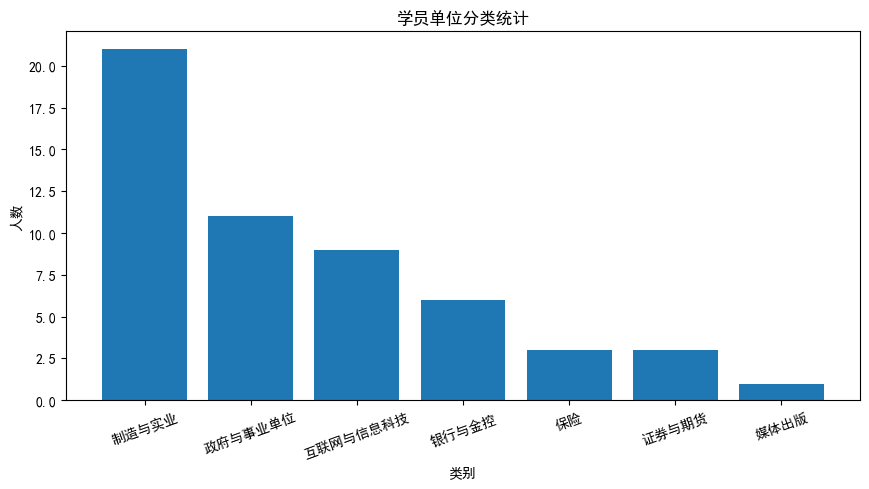

In [1]:
# -*- coding: utf-8 -*-
"""
功能：
1) 将学员所在单位归并为 7 大类
2) 统计各类人数，导出 CSV（单位分类明细、分类计数）
3) 绘制分类柱状图 PNG

运行环境：
pip install pandas matplotlib
"""

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams
from collections import OrderedDict

# ————————————————————————
# 0. 配置中文字体（自动选择；本机无中文字体时请改成你已安装的字体名）
# ————————————————————————
candidates = ["SimHei", "Microsoft YaHei", "Noto Sans CJK SC", "PingFang SC"]
available = {f.name for f in font_manager.fontManager.ttflist}
for nm in candidates:
    if nm in available:
        rcParams["font.family"] = nm
        break
rcParams["axes.unicode_minus"] = False

# ————————————————————————
# 1. 学员单位名单（已内置）
# ————————————————————————
units = [
    "数字广东网络建设有限公司",
    "荣耀终端有限公司",
    "中国联合网络通信集团广东省分公司",
    "广东裁成律师事务所",
    "富德财产保险股份有限公司",
    "深圳市积加跨境网络科技有限公司",
    "广州安迅经济发展有限公司",
    "广东天禾农资股份有限公司",
    "阿里巴巴集团",
    "广州市烟草专卖局（公司）",
    "建信金融科技有限责任公司",
    "佛山市商务局",
    "萍乡市发展和改革委员会",
    "广州高新区科技控股集团有限公司",
    "广州市荔湾区财政局",
    "广东科技企业合作促进会",
    "广州越秀金融控股集团有限公司",
    "广东乐居商贸集团有限公司",
    "广州卡姿兰企业管理有限公司",
    "广州古易蓝珠宝饰品有限公司",
    "汇丰环球客户服务（广东）有限公司",
    "广州珠江住房租赁发展投资有限公司",
    "交通银行股份有限公司广州花都支行",
    "广州开发区投资控股有限公司",
    "中国工商银行股份有限公司广东省分行",
    "广发银行股份有限公司信用卡中心",
    "深圳市五二九七投资发展有限公司",
    "广汽本田汽车有限公司",
    "广东省佛山市顺德区杏坛镇人民政府",
    "北京石基大商信息技术有限公司",
    "广东烟草河源市有限责任公司连平县分公司",
    "招商证券股份有限公司",
    "中国农业银行股份有限公司广州分行",
    "广州约克伦墙纸墙布有限公司",
    "佛山市哈啰信息技术服务有限公司",
    "一汽-大众汽车有限公司佛山分公司",
    "中国工商银行广州环城支行",
    "广东省地方金融监管局（2024 年机构改革后变为中共广东省委金融委员会办公室）",
    "广发期货",
    "大家人寿保险股份有限公司广东分公司",
    "中国共产党广州市纪律检查委员会",
    "中铁上海工程局集团市政环保工程有限公司",
    "珠海市区域和产业发展研究中心",
    "南方财经全媒体集团（广东二十一世纪环球经济报社）",
    "广东省信访局",
    "儿童福利会",
    "中国农业银行股份有限公司广州从化支行",
    "烯湾科城（广州）新材料有限公司",
    "中国江西国际经济技术合作有限公司",
    "中电金信软件有限公司北京分公司",
    "广东省广盐集团股份有限公司",
    "中国人寿保险股份有限公司广东省分公司",
    "中信证券",
    "厦门国贸纸业有限公司",
]

# ————————————————————————
# 2. 分类规则（按顺序匹配，先匹配者优先）
# ————————————————————————
rules = OrderedDict([
    ("政府与事业单位", [
        "人民政府", "商务局", "发展和改革", "财政局", "纪律检查委员会", "信访局",
        "委员会", "区域和产业发展研究中心", "合作促进会", "烟草专卖局", "省委金融委员会", "监管局",
        "儿童福利会"
    ]),
    ("银行与金控", [
        "银行", "金控", "信用卡中心", "支行", "分行"
    ]),
    ("证券与期货", [
        "证券", "期货"
    ]),
    ("保险", [
        "保险"
    ]),
    ("互联网与信息科技", [
        "阿里巴巴", "信息技术", "软件", "网络科技", "数字广东", "建信金融科技",
        "中电金信", "联通", "荣耀终端", "哈啰", "客户服务", "石基", "积加跨境"
    ]),
    ("制造与实业", [
        "汽车", "新材料", "工程局", "农资", "商贸", "珠宝", "墙纸", "住房租赁",
        "投资控股", "开发区投资控股", "广盐", "烟草", "纸业", "高新区科技控股",
        "约克伦", "卡姿兰", "乐居", "安迅经济", "国贸纸业", "珠江住房租赁"
    ]),
    ("媒体出版", [
        "全媒体", "报社", "传媒", "出版"
    ]),
])

def classify(name: str) -> str:
    """按规则顺序匹配关键词，命中即归入对应类别；否则默认归入“制造与实业”"""
    for cat, kws in rules.items():
        if any(kw in name for kw in kws):
            return cat
    return "制造与实业"

# ————————————————————————
# 3. 归类与汇总
# ————————————————————————
df = pd.DataFrame({"单位": units})
df["类别"] = df["单位"].apply(classify)

counts = (
    df.groupby("类别", as_index=False)
      .size()
      .rename(columns={"size": "人数"})
      .sort_values("人数", ascending=False)
)

print("—— 学员单位分类计数 ——")
print(counts.to_string(index=False))
print("\n—— 前 10 条明细 ——")
print(df.head(10).to_string(index=False))

# ————————————————————————
# 4. 导出 CSV 与绘图
# ————————————————————————
df.to_csv("单位分类明细.csv", index=False, encoding="utf-8-sig")
counts.to_csv("单位分类计数.csv", index=False, encoding="utf-8-sig")

plt.figure(figsize=(8.8, 5))
plt.bar(counts["类别"], counts["人数"])
plt.xlabel("类别")
plt.ylabel("人数")
plt.title("学员单位分类统计")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("学员单位分类统计.png", dpi=200)
plt.show()


绘制饼图，并标注每组的具体人数

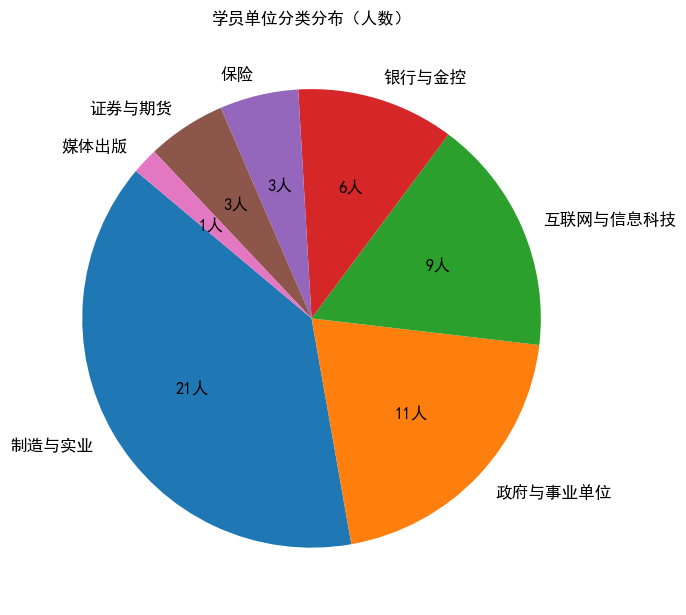

In [2]:
plt.figure(figsize=(7, 7))
plt.pie(
    counts["人数"],
    labels=counts["类别"],
    autopct=lambda pct: f"{int(round(pct/100.*counts['人数'].sum()))}人",
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("学员单位分类分布（人数）")
plt.tight_layout()
plt.show()

占比排名前三的组别，列出 4 个典型的工作单位名称，其他组别列出 1-3 个具体的工作单位名称。你酌情考虑输出格式，以便我能放在 marp slides 中。


In [5]:
# 输出适合 marp slides 的 Markdown 格式
print("## 学员单位分类典型示例\n")
for cat in counts["类别"]:
    names = result[cat]
    if cat in top3:
        print(f"**{cat}**（人数最多，典型单位）")
        for name in names:
            print(f"- {name}")
    else:
        print(f"**{cat}**（示例单位）")
        for name in names:
            print(f"- {name}")
    print()

## 学员单位分类典型示例

**制造与实业**（人数最多，典型单位）
- 中国联合网络通信集团广东省分公司
- 广东裁成律师事务所
- 广州安迅经济发展有限公司
- 广东天禾农资股份有限公司

**政府与事业单位**（人数最多，典型单位）
- 广州市烟草专卖局（公司）
- 佛山市商务局
- 萍乡市发展和改革委员会
- 广州市荔湾区财政局

**互联网与信息科技**（人数最多，典型单位）
- 数字广东网络建设有限公司
- 荣耀终端有限公司
- 深圳市积加跨境网络科技有限公司
- 阿里巴巴集团

**银行与金控**（示例单位）
- 交通银行股份有限公司广州花都支行
- 中国工商银行股份有限公司广东省分行
- 广发银行股份有限公司信用卡中心

**保险**（示例单位）
- 富德财产保险股份有限公司
- 大家人寿保险股份有限公司广东分公司
- 中国人寿保险股份有限公司广东省分公司

**证券与期货**（示例单位）
- 招商证券股份有限公司
- 广发期货
- 中信证券

**媒体出版**（示例单位）
- 南方财经全媒体集团（广东二十一世纪环球经济报社）



In [3]:
# 获取各类别的占比排名
top3 = counts.nlargest(3, "人数")["类别"].tolist()
result = {}

for cat in counts["类别"]:
    names = df[df["类别"] == cat]["单位"].tolist()
    if cat in top3:
        result[cat] = names[:4]
    else:
        result[cat] = names[:min(3, len(names))]

# 输出结果
for cat, names in result.items():
    print(f"{cat}（{len(names)}个示例）:")
    for name in names:
        print(f"  - {name}")
    print()

制造与实业（4个示例）:
  - 中国联合网络通信集团广东省分公司
  - 广东裁成律师事务所
  - 广州安迅经济发展有限公司
  - 广东天禾农资股份有限公司

政府与事业单位（4个示例）:
  - 广州市烟草专卖局（公司）
  - 佛山市商务局
  - 萍乡市发展和改革委员会
  - 广州市荔湾区财政局

互联网与信息科技（4个示例）:
  - 数字广东网络建设有限公司
  - 荣耀终端有限公司
  - 深圳市积加跨境网络科技有限公司
  - 阿里巴巴集团

银行与金控（3个示例）:
  - 交通银行股份有限公司广州花都支行
  - 中国工商银行股份有限公司广东省分行
  - 广发银行股份有限公司信用卡中心

保险（3个示例）:
  - 富德财产保险股份有限公司
  - 大家人寿保险股份有限公司广东分公司
  - 中国人寿保险股份有限公司广东省分公司

证券与期货（3个示例）:
  - 招商证券股份有限公司
  - 广发期货
  - 中信证券

媒体出版（1个示例）:
  - 南方财经全媒体集团（广东二十一世纪环球经济报社）

